In [1]:
from object_detection_model import ObjectDetectionModel
from quick_draw_dataset import QuickDrawDataset
from inpainting.inpaint import Inpainting
from util import resize
from util import load_image_into_numpy_array

import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
object_detection = ObjectDetectionModel()
qd_dataset = QuickDrawDataset()
inpainting = Inpainting()

Evaluating :  IMG_2531.jpeg


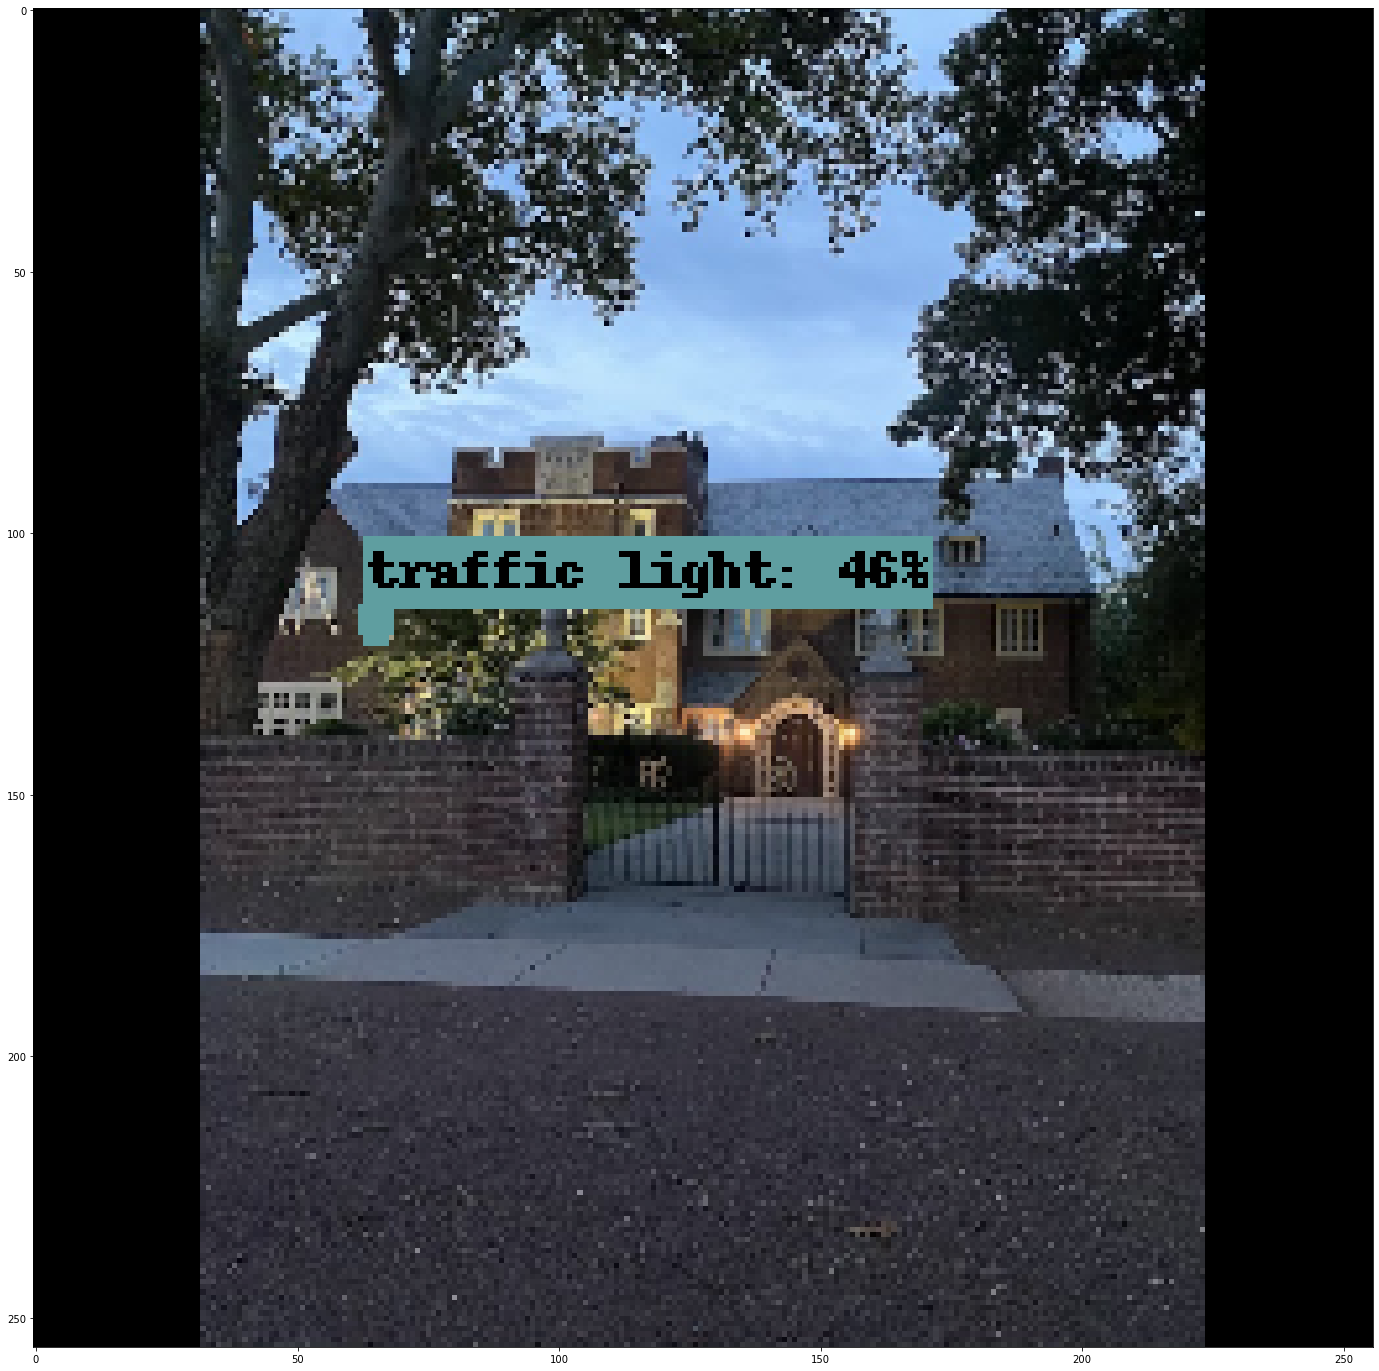

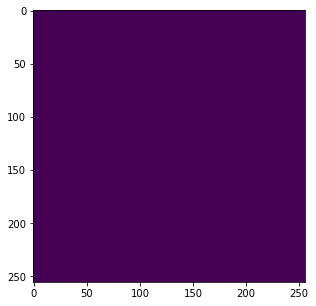

Inpainting...


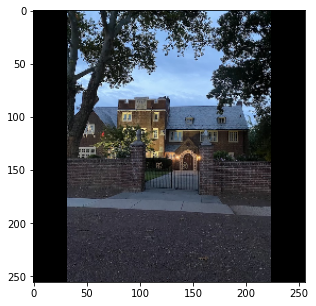

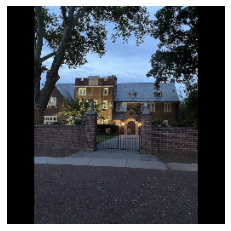

Evaluating :  IMG_2629.JPG


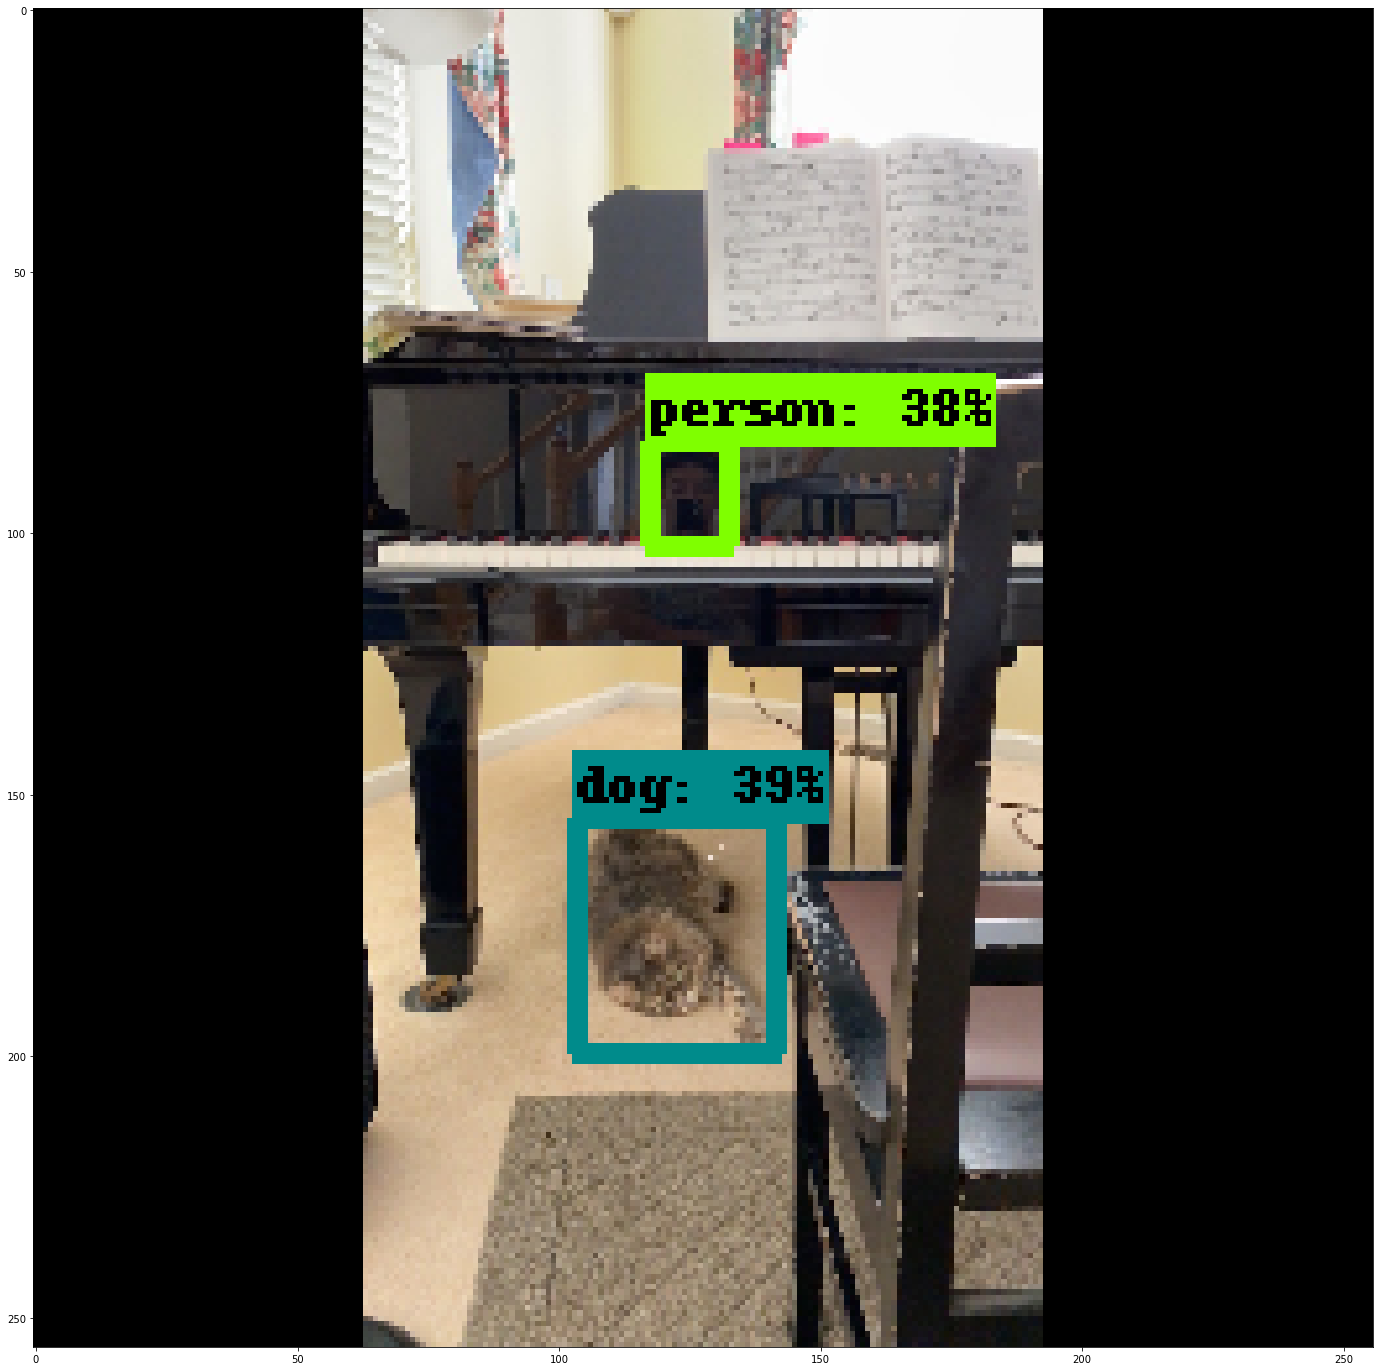

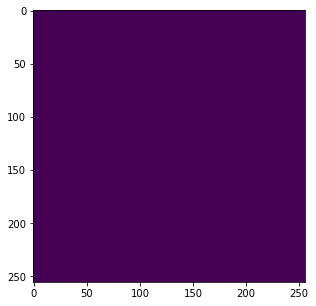

Inpainting...


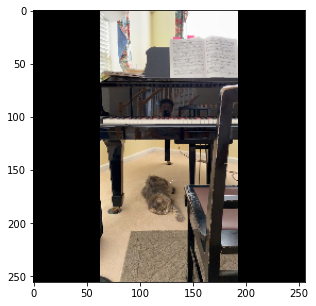

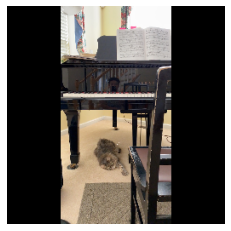

Evaluating :  IMG_2838.jpeg


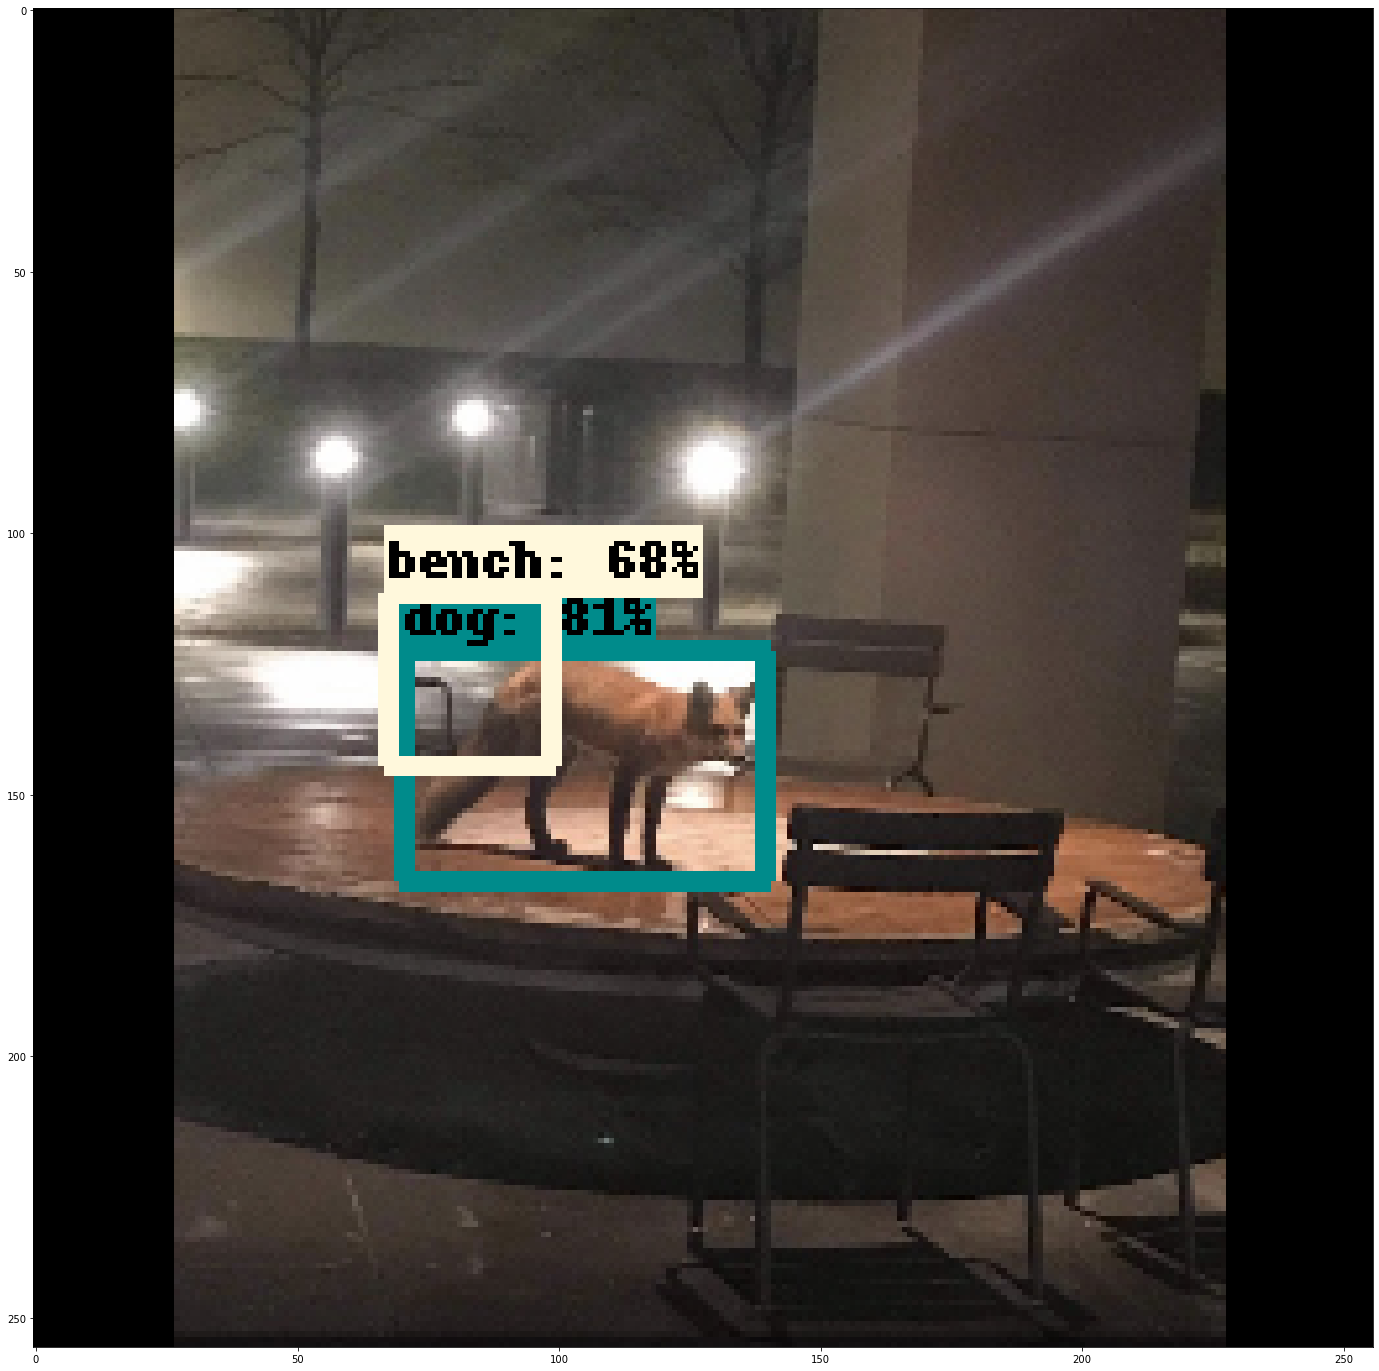

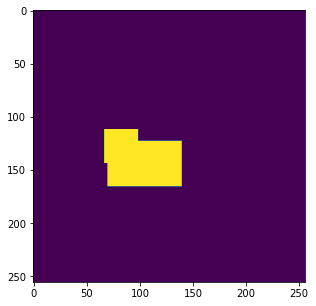

Inpainting...


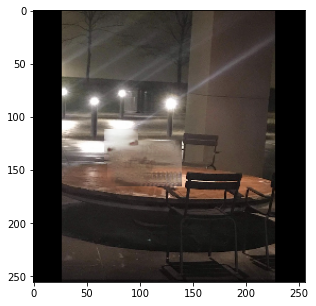

loading dog drawings
load complete
loading bench drawings
load complete


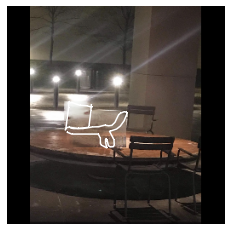

Evaluating :  IMG_2208.jpeg


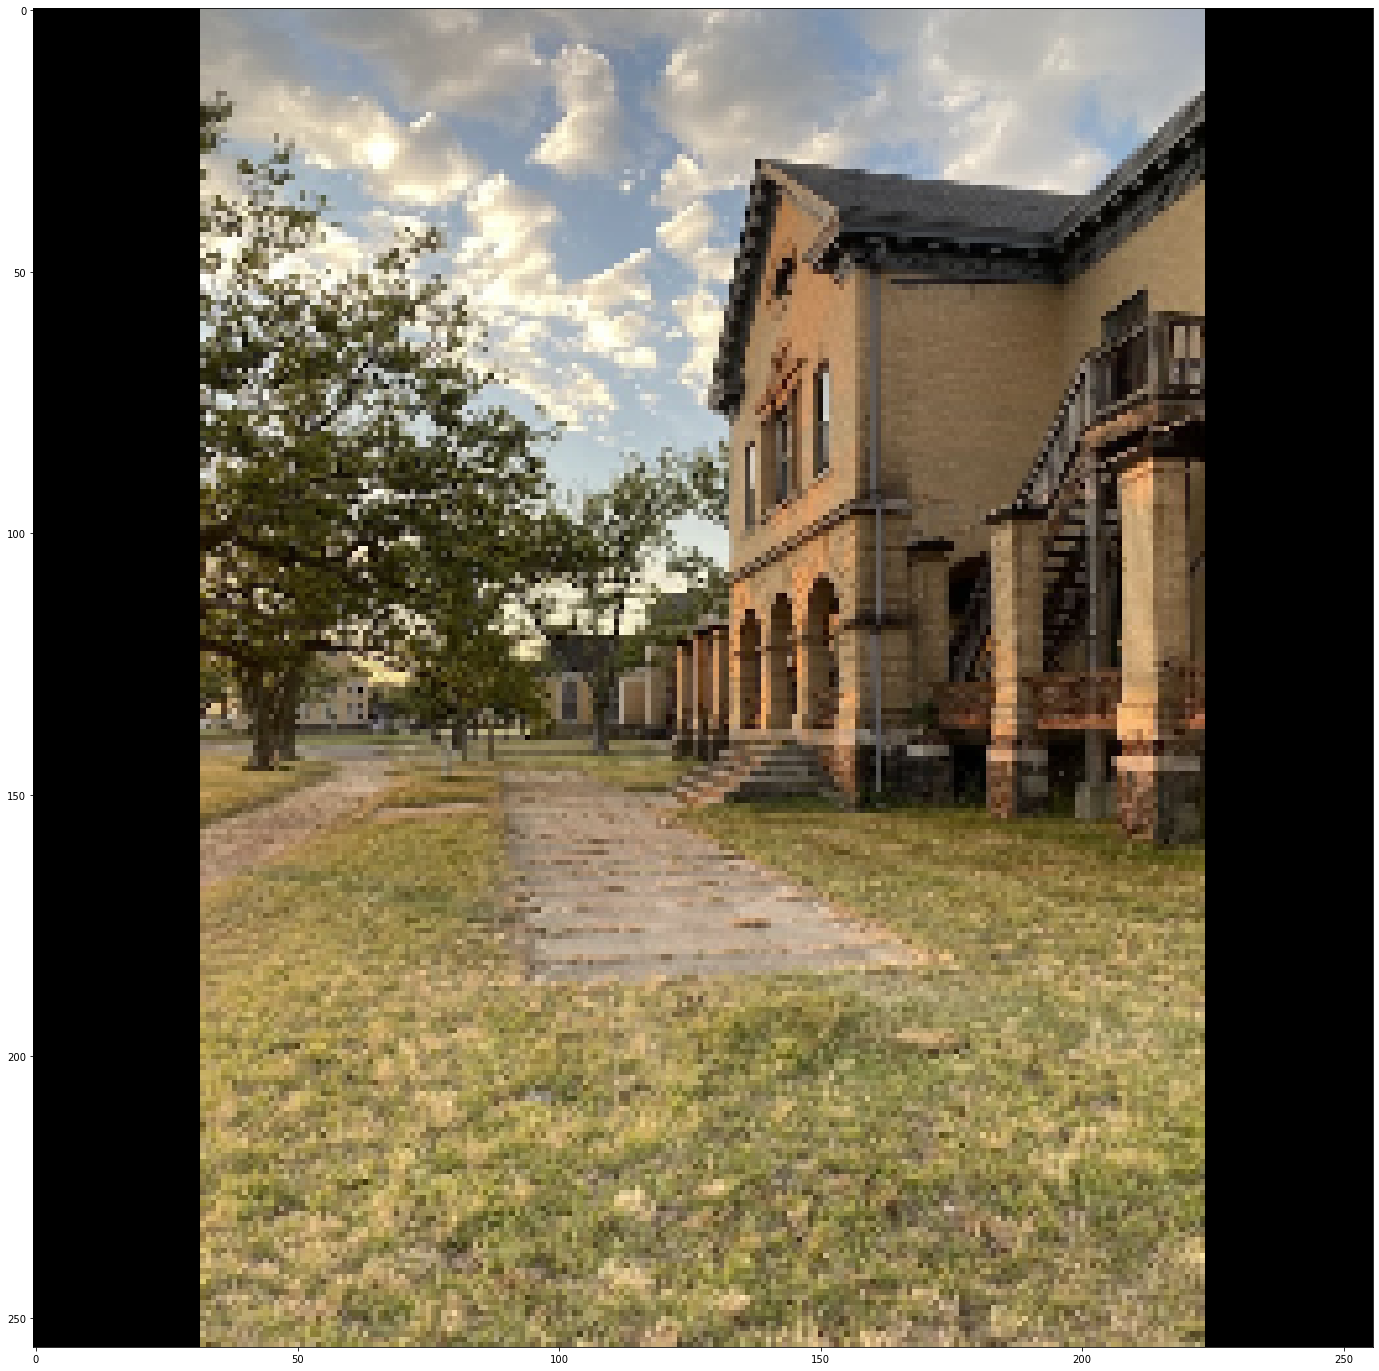

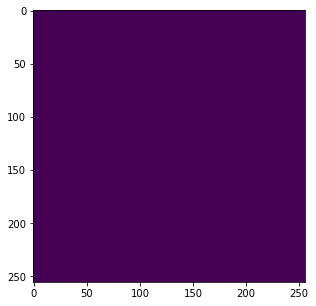

Inpainting...


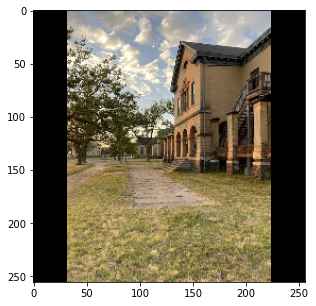

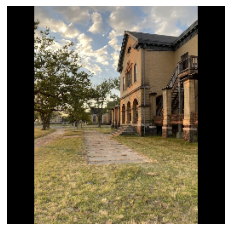

Evaluating :  IMG_2884.JPG


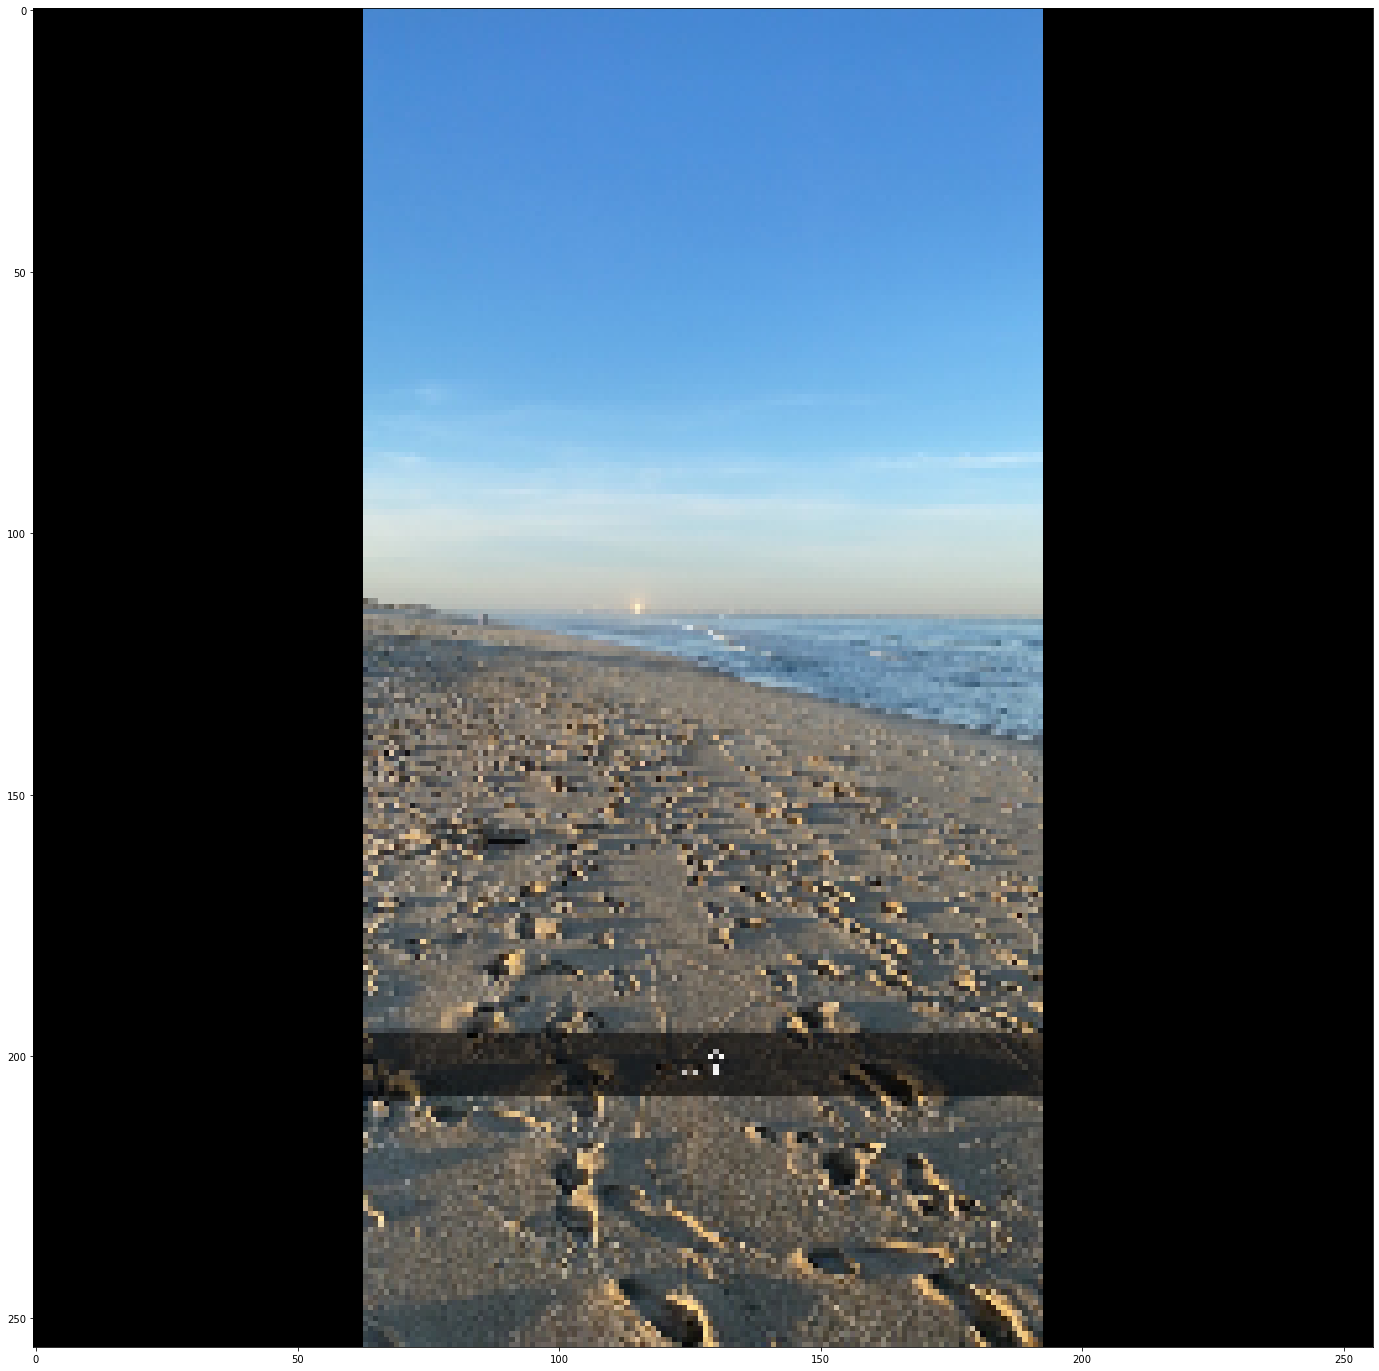

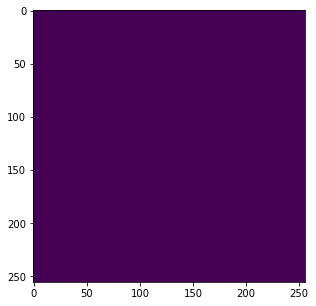

Inpainting...


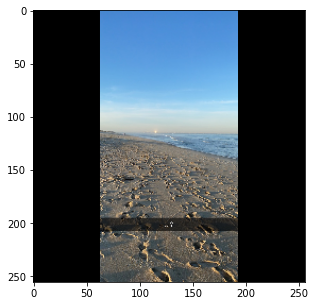

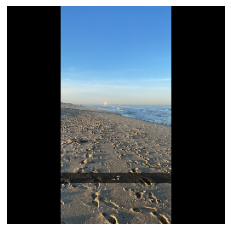

Evaluating :  IMG_0711.jpeg


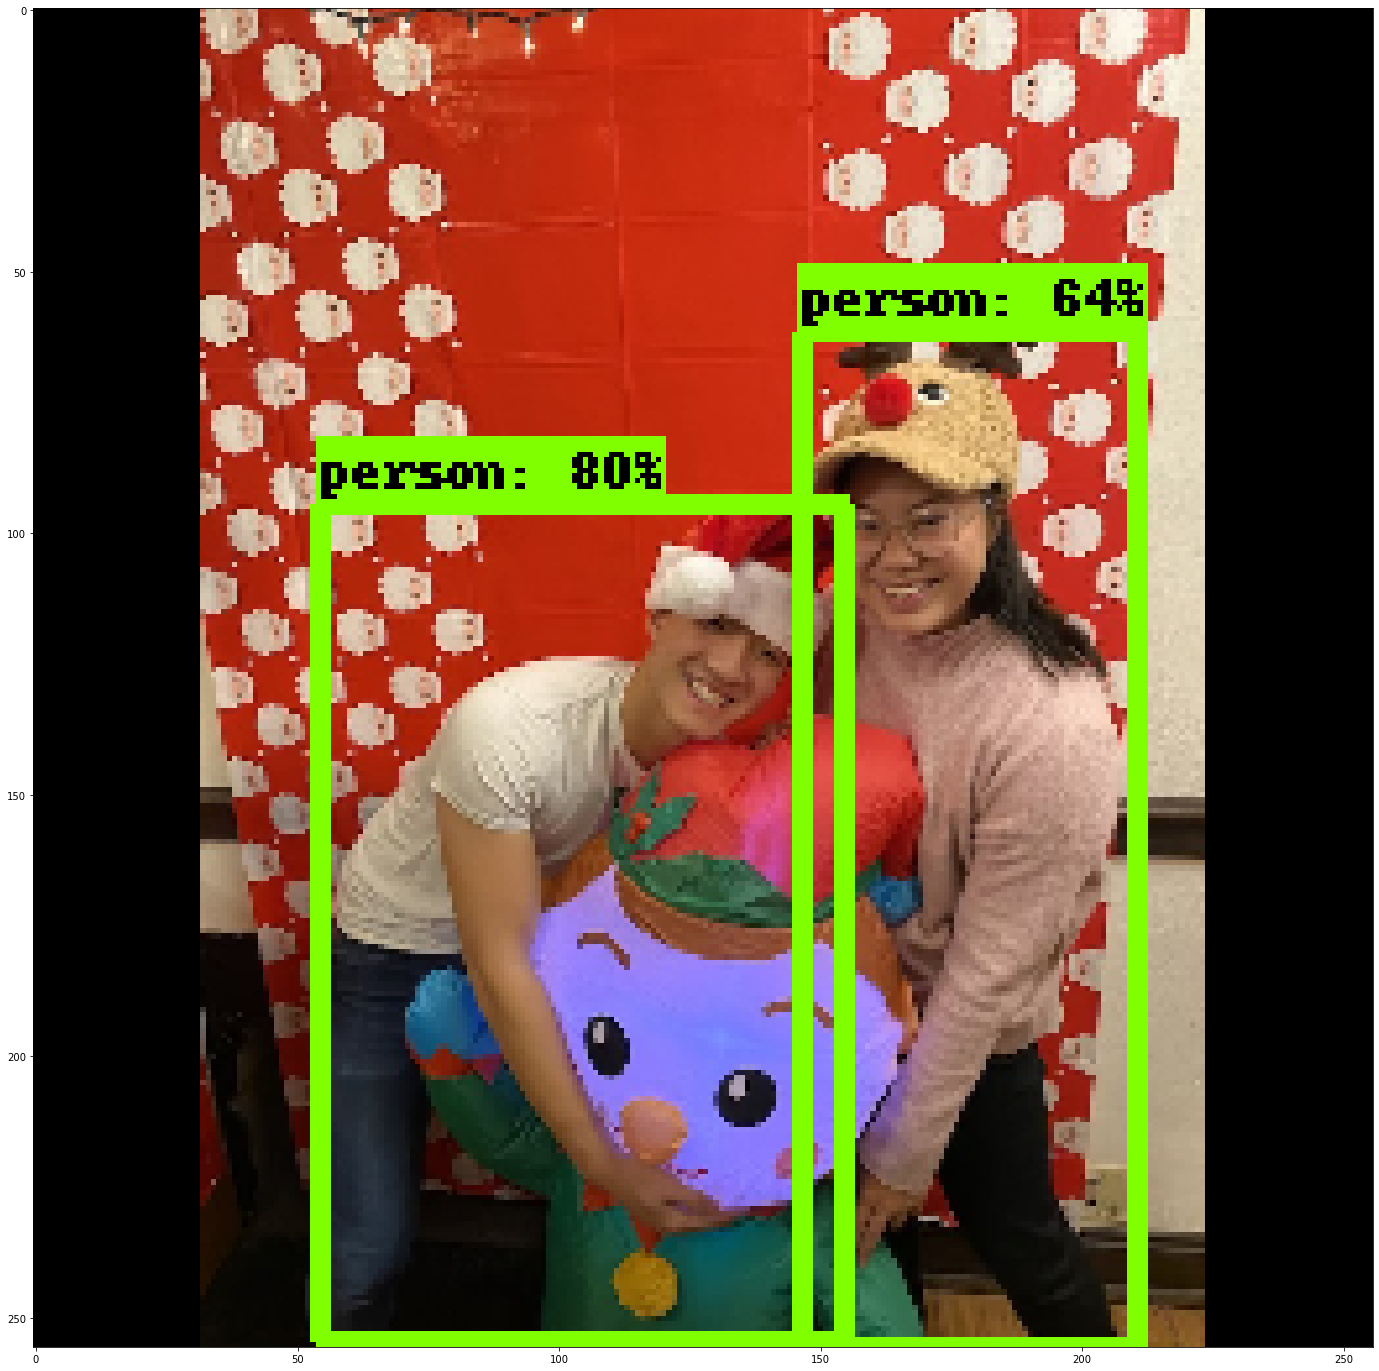

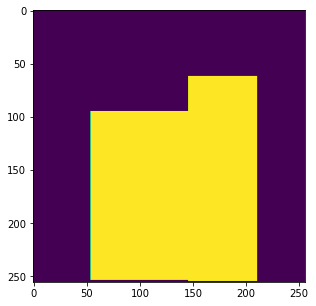

Inpainting...


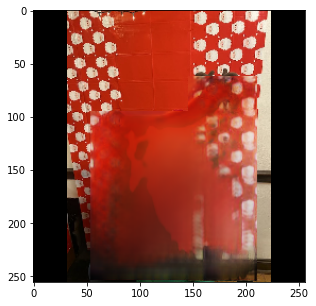

loading duck drawings
load complete


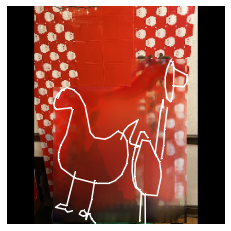

Evaluating :  IMG_0969.jpeg


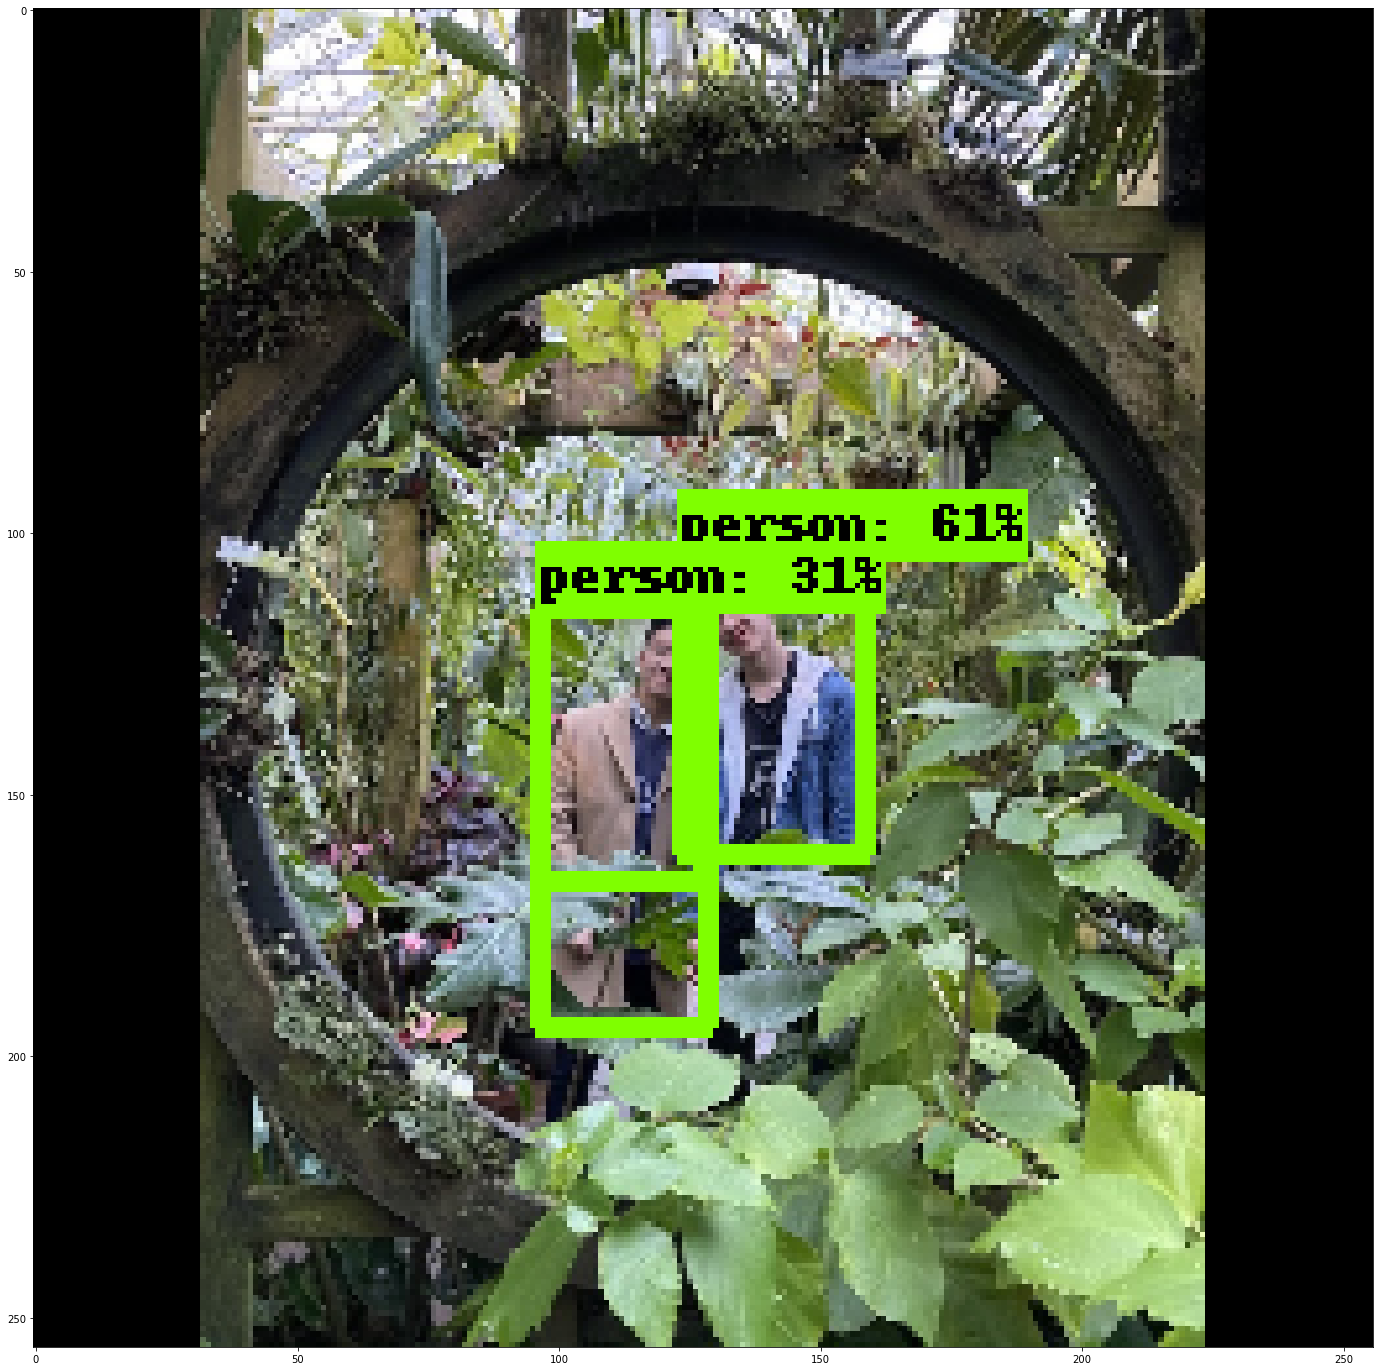

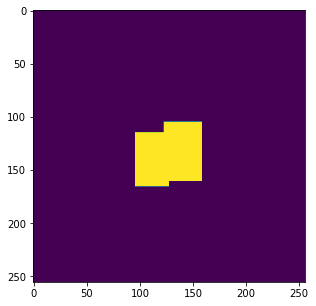

Inpainting...


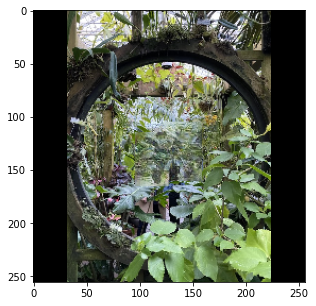

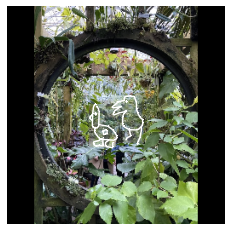

Evaluating :  IMG_1206.JPG


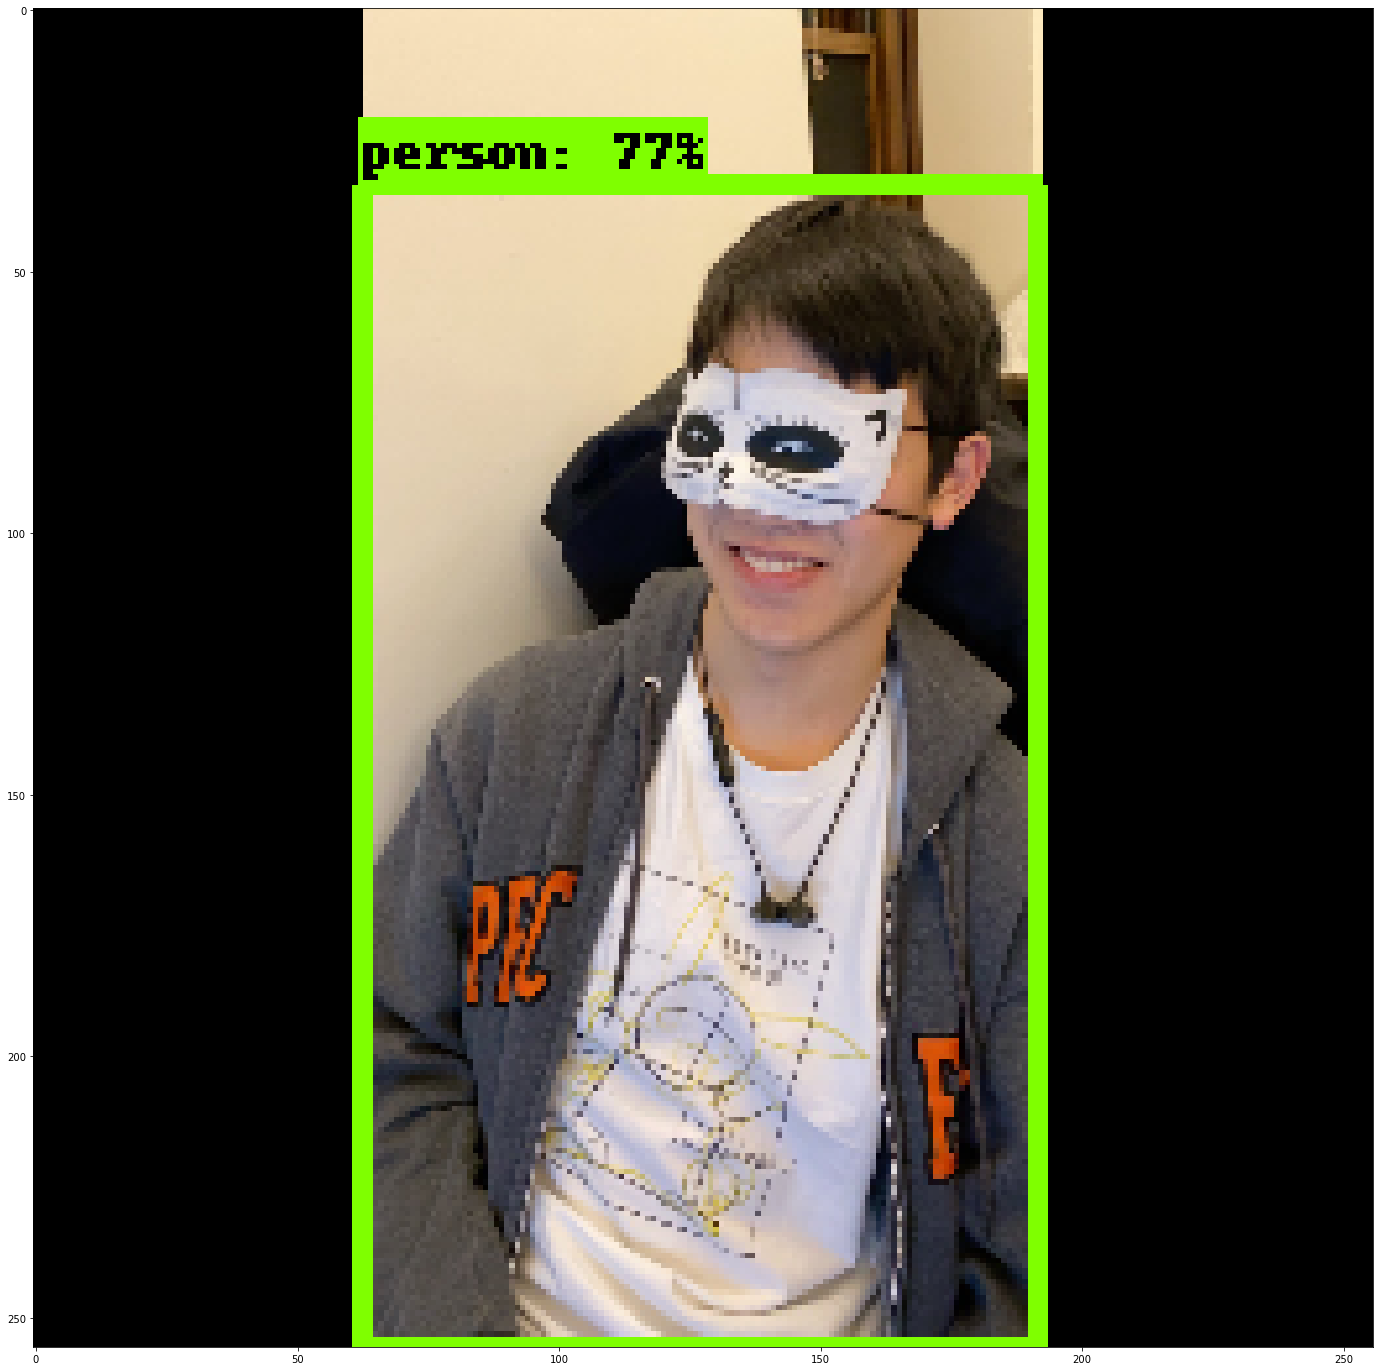

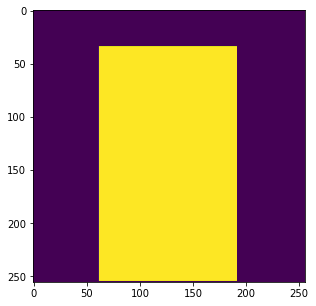

Inpainting...


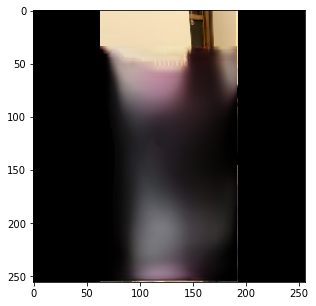

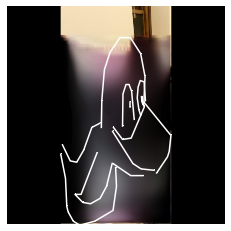

In [4]:
# Runs image evaluation on image in source_path and saves results to sink_path
def evaluate(object_detection, qd_dataset, inpainting, source_path, sink_path):
    for filename in os.listdir(source_path):
        if filename.endswith(".JPG") or filename.endswith(".PNG") or filename.endswith(".jpeg"):
            print('Evaluating : ', filename)
            image_np = load_image_into_numpy_array(os.path.join(source_path, filename))
            image_resized = resize(image_np, 256)
            
#             plt.figure(figsize=(5,5))
#             plt.imshow(image_np[0])
#             plt.show()
            
            detections = object_detection.inference(image_resized, logging=True)
            pruned_detections = qd_dataset.prune_detections(image_resized.shape, detections, threshold=0.5)
            
            mask = inpainting.create_mask(pruned_detections, logging=True)
            image_inpainted = inpainting.inpaint(image_resized, mask, logging=True)
            
#             plt.figure(figsize=(5,5))
#             plt.imshow(image_inpainted)
#             plt.show()
            
            drawn_image = qd_dataset.draw(image_inpainted, pruned_detections, os.path.join(sink_path, filename), logging=True)
            
#             plt.figure(figsize=(5,5))
#             plt.imshow(drawn_image)
#             plt.show()
            
evaluate(object_detection, qd_dataset, inpainting, 'test_images', 'test_images_drawn')